In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

Un estudio considera que existe relación entre el hecho de que un estudiante asista a clases de repaso de lectura (sí = 1, no = 0), la nota que obtiene en un examen de lectura estándar (realizado antes de iniciar las clases de repaso) y el sexo (hombre = 1, mujer = 0). Se quiere generar un modelo en el que a partir de las variables puntuación del examen y sexo, prediga la probabilidad de que el estudiante tenga que asistir a clases de repaso.

In [3]:
sexo = np.array(["hombre", "hombre", "mujer", "mujer", "mujer", "hombre",
                             "mujer", "hombre", "mujer", "mujer", "hombre", "hombre",
                             "hombre", "hombre", "mujer", "mujer", "hombre", "mujer",
                             "hombre", "mujer", "hombre", "mujer", "mujer", "hombre",
                             "hombre", "mujer", "mujer", "mujer", "hombre", "hombre",
                             "hombre", "mujer", "hombre", "mujer", "hombre", "mujer",
                             "mujer", "mujer", "mujer", "mujer", "hombre", "mujer",
                             "hombre", "mujer", "mujer", "mujer", "mujer", "hombre",
                             "mujer", "hombre", "mujer", "hombre", "mujer", "mujer",
                             "hombre", "hombre", "hombre", "hombre", "hombre", "hombre",
                             "hombre", "hombre", "hombre", "mujer", "hombre", "hombre",
                             "hombre", "hombre", "mujer", "hombre", "mujer", "hombre",
                             "hombre", "hombre", "mujer", "hombre", "mujer", "mujer",
                             "hombre", "mujer", "mujer", "mujer", "hombre", "hombre",
                             "hombre", "hombre", "hombre", "mujer", "mujer", "mujer",
                             "mujer", "hombre", "mujer", "mujer", "mujer", "mujer",
                             "mujer", "mujer", "mujer", "mujer","mujer", "mujer",
                             "hombre", "mujer", "hombre", "hombre", "mujer", "mujer",
                             "mujer", "hombre","mujer", "hombre", "mujer", "mujer",
                             "mujer", "hombre", "mujer", "hombre", "mujer", "hombre",
                             "mujer", "hombre", "mujer", "mujer", "mujer", "mujer",
                             "mujer", "mujer", "mujer", "mujer", "hombre", "mujer",
                             "hombre", "hombre", "hombre", "hombre", "hombre", "hombre",
                             "hombre", "mujer","mujer", "mujer", "hombre", "hombre",
                             "mujer", "mujer", "hombre", "mujer", "hombre", "hombre",
                             "hombre", "mujer", "mujer", "mujer", "mujer", "hombre",
                             "hombre", "mujer", "hombre", "hombre", "mujer", "hombre",
                             "hombre", "hombre", "hombre", "mujer", "hombre", "hombre",
                             "mujer", "mujer", "hombre", "hombre", "hombre", "hombre",
                             "hombre", "mujer", "mujer", "mujer", "mujer", "hombre",
                             "hombre", "hombre", "mujer", "hombre", "mujer", "hombre",
                             "hombre", "hombre", "mujer"])

examen_lectura = np.array([91, 77.5, 52.5, 54, 53.5, 62, 59, 51.5,
                                       61.5, 56.5, 47.5, 75, 47.5, 53.5, 50, 50,
                                       49, 59, 60, 60, 60.5, 50, 101, 60, 60,
                                       83.5, 61, 75, 84, 56.5, 56.5, 45, 60.5,
                                       77.5, 62.5, 70, 69, 62, 107.5, 54.5, 92.5,
                                       94.5, 65, 80, 45, 45, 66, 66, 57.5, 42.5,
                                       60, 64, 65, 47.5, 57.5, 55, 55, 76.5,
                                       51.5, 59.5, 59.5, 59.5, 55, 70, 66.5,
                                       84.5, 57.5, 125, 70.5, 79, 56, 75, 57.5,
                                       56, 67.5, 114.5, 70, 67, 60.5, 95, 65.5,
                                       85, 55, 63.5, 61.5, 60, 52.5, 65, 87.5,
                                       62.5, 66.5, 67, 117.5, 47.5, 67.5, 67.5,
                                       77, 73.5, 73.5, 68.5, 55, 92, 55, 55, 60,
                                       120.5, 56, 84.5, 60, 85, 93, 60, 65, 58.5,
                                       85, 67, 67.5, 65, 60, 47.5, 79, 80, 57.5,
                                       64.5, 65, 60, 85, 60, 58, 61.5, 60, 65,
                                       93.5, 52.5, 42.5, 75, 48.5, 64, 66, 82.5,
                                       52.5, 45.5, 57.5, 65, 46, 75, 100, 77.5,
                                       51.5, 62.5, 44.5, 51, 56, 58.5, 69, 65,
                                       60, 65, 65, 40, 55, 52.5, 54.5, 74, 55,
                                       60.5, 50, 48, 51, 55, 93.5, 61, 52.5,
                                       57.5, 60, 71, 65, 60, 55, 60, 77, 52.5,
                                       95, 50, 47.5, 50, 47, 71, 65])

clases_repaso = np.array(["0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "0", "0", "0", "0", "0", "0",
                                      "0", "0", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1", "1", "1", "1",
                                      "1", "1", "1", "1", "1"])

datos = pd.DataFrame({'repaso':clases_repaso, 'examen_lectura': examen_lectura,'sexo':sexo})

In [6]:
datos.head(5)

,repaso,examen_lectura,sexo
0,0,91.0,hombre
1,0,77.5,hombre
2,0,52.5,mujer
3,0,54.0,mujer
4,0,53.5,mujer


In [5]:
dummy_sexo = pd.get_dummies(datos["sexo"], prefix = "sexo").iloc[:,1:]
dummy_sexo.head()

,sexo_mujer
0,0
1,0
2,1
3,1
4,1


In [7]:
column_names = datos.columns.values.tolist()
datos2 = datos[column_names].join(dummy_sexo)
datos2.head()

,repaso,examen_lectura,sexo,sexo_mujer
0,0,91.0,hombre,0
1,0,77.5,hombre,0
2,0,52.5,mujer,1
3,0,54.0,mujer,1
4,0,53.5,mujer,1


In [15]:
datos2["repaso"] = pd.to_numeric(datos2["repaso"])

In [16]:
feature_cols = ["examen_lectura", "sexo_mujer"]
X = datos2[feature_cols]
Y = datos2["repaso"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [18]:
import statsmodels.api as sm

In [19]:
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.594501
         Iterations 5


In [20]:
result.summary2()

Model: Logit Pseudo R-squared: 0.024 
 
 
 Dependent Variable: repaso AIC: 183.5393 
 
 
 Date: 2022-06-03 09:23 BIC: 189.5739 
 
 
 No. Observations: 151 Log-Likelihood: -89.770 
 
 
 Df Model: 1 LL-Null: -91.985 
 
 
 Df Residuals: 149 LLR p-value: 0.035303 
 
 
 Converged: 1.0000 Scale: 1.0000 
 
 
 No. Iterations: 5.0000 
 
 
 
 
 Coef. Std.Err. z P>|z| [0.025 0.975] 
 
 
 examen_lectura -0.0111 0.0037 -3.0178 0.0025 -0.0183 -0.0039 
 
 
 sexo_mujer -0.3633 0.3588 -1.0126 0.3112 -1.0665 0.3399

In [21]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
logit_model.score(X_train,Y_train)

0.7019867549668874

In [24]:
pd.DataFrame(list(zip(X_train.columns, np.transpose(logit_model.coef_))))

,0,1
0,examen_lectura,[-0.02499866503501026]
1,sexo_mujer,[-0.3744336768270714]


In [25]:
from sklearn import metrics

In [26]:
probs = logit_model.predict_proba(X_test)
prob = probs[:,1]
probs

In [27]:
prediction = logit_model.predict(X_test)
prediction

In [28]:
metrics.accuracy_score(Y_test, prediction)

0.631578947368421

In [31]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [32]:
df = pd.DataFrame({
    'esp':espc_1,
    'sens':sensit
})
df.head()

,esp,sens
0,0.000000,0.000000
1,0.000000,0.071429
2,0.000000,0.285714
3,0.041667,0.285714
4,0.041667,0.357143


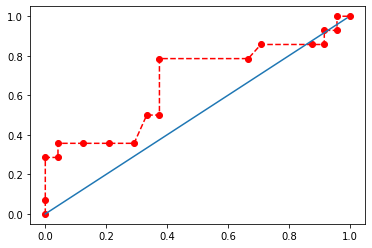

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(espc_1,sensit, marker='o', linestyle='--', color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)